In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from geopy import distance
import geopandas
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import RFECV, RFE

import math
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('Solarize_Light2')

Help from:
<li>https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
<li>https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb
<li>https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392
<li>https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02
<li>https://medium.com/towards-data-science/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be
<li> Data 3950 class notebooks
<li>Udemy Summer 2022: Python DataScience ML Bootcamp & Machnine Learning AtoZ

In [21]:
# Load some data
#original = pd.read_csv("https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/fraudTrain.csv.zip")
#original.drop(columns={"Unnamed: 0"}, inplace=True)
#original.to_csv('Assignemnt4data.csv', index=None)

In [22]:
original=pd.read_csv('Assignemnt4data.csv')
original.head(3)
#original.drop(columns={"Unnamed: 0"}, inplace=True)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


>Losses related to credit card fraud will grow to $43 billion within five years and climb to $408.5 billion globally within the next decade, according to a recent Nilson Report — meaning that credit card fraud detection has become more important than ever. 
With digital crime and online fraud of all kinds on the rise, it’s more important than ever for organizations to take firm and clear steps to prevent payment card fraud through advanced technology and strong security measures.(https://www.inscribe.ai/fraud-detection/credit-fraud-detection)

There are two types of Credit card fraud:
<li>Card present fraud, and
<li>Card-not-present fraud.

CARD PRESENT FRAUD is when the criminal uses a physical card, which is either stolen or duplicated, to make fraudulent purchases. Card present fraud can be the result of the theft of a card through robbery, pickpocketing, or mail theft.

CARD-NOT-PRESENT FRAUD is when the criminal uses the details associated with the card, such as the card number, accountholder name, and CVV code, without having the card in their possession.

> Credit card fraud detection is the collective term for the policies, tools, methodologies, and practices that credit card companies and financial institutions take to combat identity fraud and stop fraudulent transactions.  

In recent years, as the amount of data has exploded and the number of payment card transactions has skyrocketed, fraud detection has become largely digitized and automated. Most modern solutions leverage artificial intelligence (AI) and machine learning (ML) to manage data analysis, predictive modeling, decision-making, fraud alerts and remediation activity that occur when individual instances of credit card fraud are detected.  

> ANOMALY DETECTION is the process of analyzing massive amounts of data points from both internal and external sources to produce a framework of “normal” activity for each individual user and establish regular patterns in their activity.

Data used to create the user profile includes:

<li>Purchase history and other historical data
<li>Location
<li>Device ID
<li>IP address
<li>Payment amount
<li>Transaction information

When a transaction falls outside the scope of normal activity, the anomaly detection tool will then alert the card issuer and, in some cases, the user. Depending on the transaction details and risk score assigned to the action, these fraud detection systems may flag the purchase for review or put a hold on the transaction until the user verifies their activity.

>What can be an anomaly?
<li>A sudden increase in spending
<li>Purchase of a large ticket item
<li>A series of rapid transactions
<li>Multiple transactions with the same merchant
<li>Transactions that originate in an unusual location or foreign country
<li>Transactions that occur at unusual times

>Predictive modeling
 In addition to finding anomalies within a specific user account, ML models and predictive analytics can also be used to track and identify fraud patterns or point to an ongoing, nuanced fraud scheme. Predictive modeling is an important capability since cybercriminals are constantly updating their techniques to evade detection by existing tools and methods.  

In [23]:
#Make copy of the original
df=original.copy() 
print('Shape:', df.shape)
print('Total Null Values: ', df.isnull().sum().sum())
#print()
#df.head(2)

Shape: (1296675, 22)
Total Null Values:  0


># Preprocess dataframe before feature selection

In [24]:
# Extract year, month, day, hour, minute, and second features
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second

# Convert month numerical values to month names
#month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#df['month'] = df['month'].apply(lambda x: month_names[x-1])

# Convert day numerical values to include suffixes
#suffixes = {1: 'st', 2: 'nd', 3: 'rd'}
#df['day'] = df['day'].apply(lambda x: str(x) + suffixes.get(x if x < 20 else x % 10, 'th'))

# Drop the original trans_date_trans_time column
df.drop('trans_date_trans_time', axis=1, inplace=True)

# Combine the first and last name columns into a single column called Names
df['Names'] = df['first'] + '-' + df['last']

# Drop the original first and last name columns
df.drop(['first', 'last'], axis=1, inplace=True)

# Extract the age feature
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now(tz=None) - df['dob']).astype('<m8[Y]')

# Drop the original dob column
df.drop('dob', axis=1, inplace=True)

#rename column is_fraud to Target
df.rename(columns={'is_fraud':'Target'}, inplace=True)
df['target']=df['Target'] #Move target column to the end 
df.drop(['Target'], axis=1, inplace=True)

# Print the first few rows of the modified DataFrame
df.head(2)

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,merch_long,year,month,day,hour,minute,second,Names,age,target
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,-82.048315,2019,1,1,0,0,18,Jennifer-Banks,35.0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,-118.186462,2019,1,1,0,0,44,Stephanie-Gill,44.0,0


># Feature Selection

><h3>Target 

In [25]:
# Examine the Target variable
def Target_Dist(data, target):
    neg, pos = np.bincount(df[target])
    total = neg + pos
    return print('Target Distribution:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Target_Dist(df, 'target')

Target Distribution:
    Total: 1296675
    Positive: 7506 (0.58% of total)



This is INSANE!!!!
<li>Will have to read the link by Akeem on how to fix this: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#setup

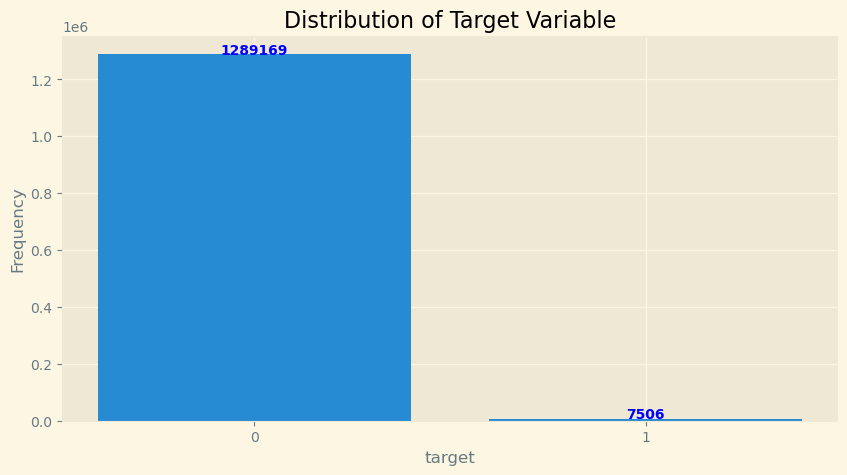

In [26]:
# Visualizing the target imbalance with countplot
def Target_Countplot(data, target):
    counts = data[target].value_counts()

    # Plot the frequency of each category in the target variable
    plt.bar(counts.index, counts.values)
    plt.xlabel('target')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])
    plt.title('Distribution of Target Variable')

    # Add annotations to the bar chart
    for i, v in enumerate(counts.values):
        plt.text(i, v, str(v), color='blue', ha='center', fontweight='bold')

    plt.show()

Target_Countplot(df, 'target')

Distribution of Target 0, 1 by Latitude and Longitude using scatterplot

<Figure size 2000x1000 with 0 Axes>

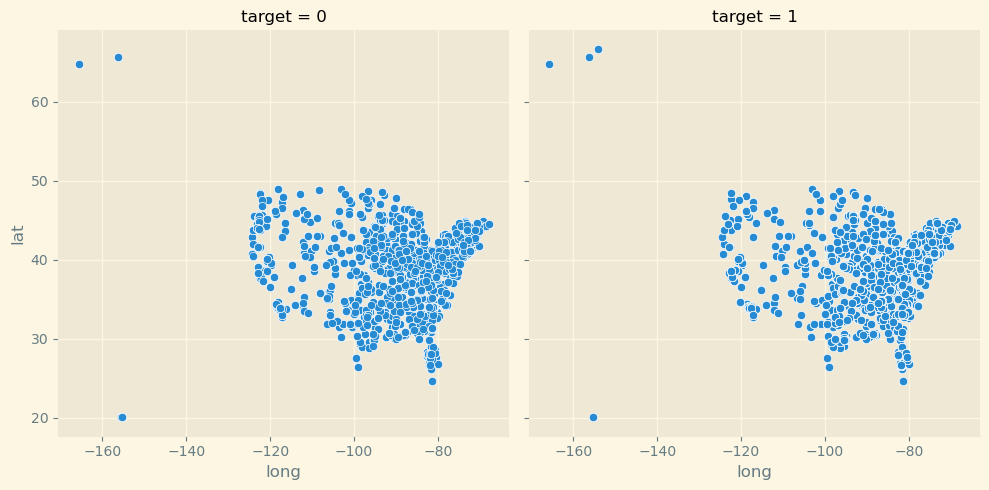

In [27]:
plt.figure(figsize=(20,10))
sns.relplot(
    data=df, x="long", y="lat",
    col="target",
    kind="scatter"
)

<Figure size 2000x1000 with 0 Axes>

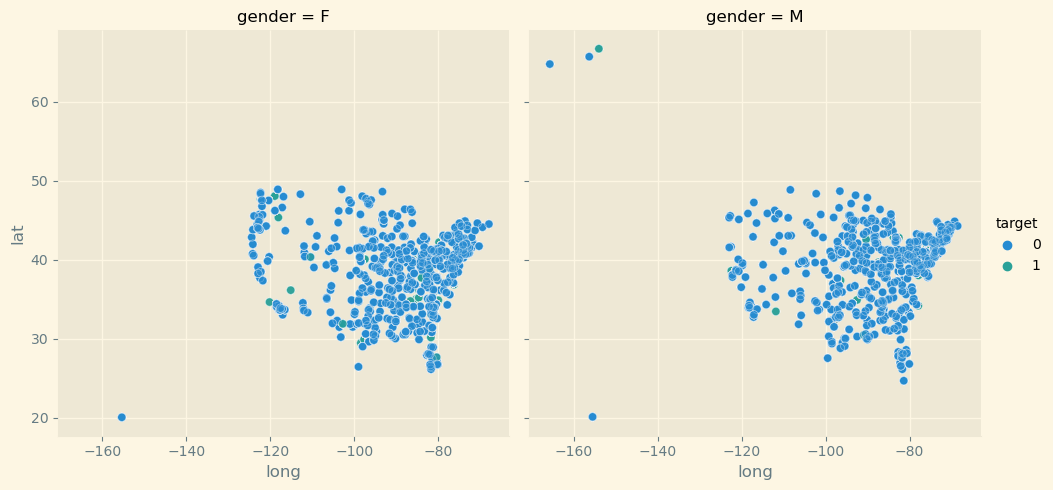

In [28]:
plt.figure(figsize=(20,10))
sns.relplot(
    data=df, x="long", y="lat",
    col="gender", hue="target", alpha=.3,
    kind="scatter"
)

In [29]:
# Create a function to address the imbalanced Target variable.
#   Rule_percentage of 1 (100%): Target 1==Target 0
#   Rule_percentage of 0.5 (50%): Target 1 is 50% of Target 0
#   Rule_percentage of 0.1 (10%): Target 1 is 10% of Target 0
def balance_dataset(df, rule_percentage):
    """
    Balance a binary classification dataset by undersampling the majority class
    to achieve a given percentage ratio between the minority and majority class.

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to balance. Assumes binary classification with the target
        variable named 'target'.
    rule_percentage : float
        The percentage of the majority class size to sample, in order to achieve
        the desired ratio with the minority class size.

    Returns:
    --------
    pandas DataFrame
        The balanced dataset.
    """
    # Separate majority and minority classes
    df_majority = df[df.target == 0]
    df_minority = df[df.target == 1]

    # Get the size of the minority class
    minority_size = len(df_minority)

    # Calculate the sample size for the majority class to achieve the desired ratio
    #majority_size = int(minority_size / (1 - rule_percentage))
    """The new line of code, majority_size = int(minority_size / (1 - rule_percentage)), 
    allows for more flexibility in the rule_percentage. 
    For example, if the rule_percentage is set to 50%, then the majority class would be twice the size of the minority class. 
    If the rule_percentage is set to 70%, then the majority class would be about 2.33 times the size of the minority class."""
    majority_size = int(minority_size / rule_percentage)
    """The original line of code, majority_size = int(minority_size / rule_percentage), assumes that the majority class...
       will be 75% of the minority class."""
    # Sample the majority class
    df_majority_sampled = df_majority.sample(n=majority_size, random_state=42)

    # Combine minority class with sampled majority class
    df_balanced = pd.concat([df_majority_sampled, df_minority])

    # Shuffle the dataset
    df_balanced = df_balanced.sample(frac=1, random_state=42)
    print(f'Shape of Balanced Dataset at rule_percentage, {rule_percentage}, is: ', df_balanced.shape)
    neg, pos = np.bincount(df_balanced['target'])
    total = neg + pos
    print('Distribution of Targets:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

    return df_balanced

In [30]:
#lets view what happens to the different measures/rule_percentages used on the size of the dataframe.
list=[.1, 0.2, 0.5, 0.6, 1]
for num in list:
  df_balanced = balance_dataset(df, num)

Shape of Balanced Dataset at rule_percentage, 0.1, is:  (82566, 26)
Distribution of Targets:
    Total: 82566
    Positive: 7506 (9.09% of total)

Shape of Balanced Dataset at rule_percentage, 0.2, is:  (45036, 26)
Distribution of Targets:
    Total: 45036
    Positive: 7506 (16.67% of total)

Shape of Balanced Dataset at rule_percentage, 0.5, is:  (22518, 26)
Distribution of Targets:
    Total: 22518
    Positive: 7506 (33.33% of total)

Shape of Balanced Dataset at rule_percentage, 0.6, is:  (20016, 26)
Distribution of Targets:
    Total: 20016
    Positive: 7506 (37.50% of total)

Shape of Balanced Dataset at rule_percentage, 1, is:  (15012, 26)
Distribution of Targets:
    Total: 15012
    Positive: 7506 (50.00% of total)



As we can see from the above, as we undersample the target=0 to match the rule_percentage to balance the target variable to target=1, we see that the dataframe becomes smaller. The bigger the dataset for training the better it is for the outcome of the model. But since our original target is so imbalanced at 0.58% of the total traget, we have to make some compromise here.

We want to try and keep as many rows as possible, but at the same time we also want to increase the ration of Target=1 to Target =0

In [31]:
#create a list that will carry the columns that need to be deleted/dropped from the dataframe.
drop_list=[]

># Numeric Columns

In [32]:
# What are the numerical columns?
df.select_dtypes(include=[np.number]).columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'age', 'target'],
      dtype='object')

>### Credit Card Number Column-'cc_num'

In [33]:
df['cc_num'].value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

This is a numerical column, and it is the credit card numbers; we NEED this column.

>### Amount Column-'amt'

<Axes: xlabel='amt', ylabel='Density'>

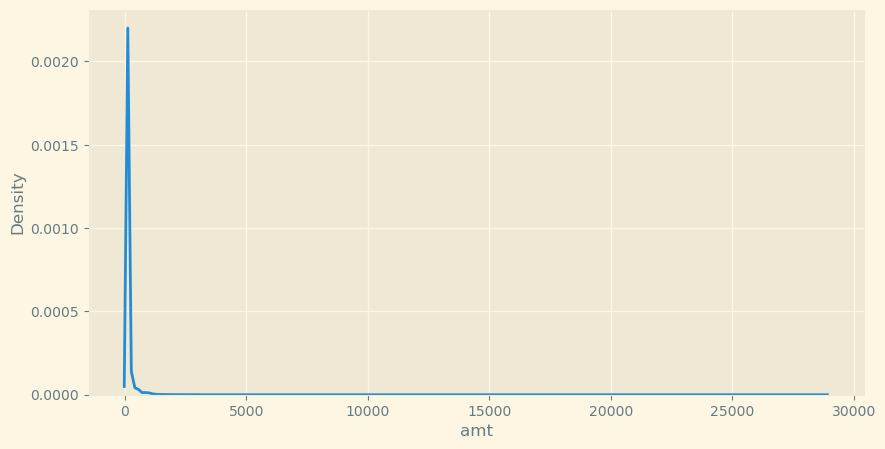

In [34]:
sns.kdeplot(df['amt'])

In [35]:
#df.groupby('target')['amt'].()

This is ridiculously NOT good.

In [36]:
# From the results above (which was a head scratcher), i decided to only use 'amt' > $100
# Usually amounts this low are forwarded as bad debt and unrecoverable. It would cost more to recover these amounts. Best to file them as bad debt.
#df=df[df['amt']>100]

In [37]:
df.shape

(1296675, 26)

Well..the dataset went down to 234893 rows from the original 1296675. we lost 18% of the original dataset.

Distribution of 'amt' based on Target 

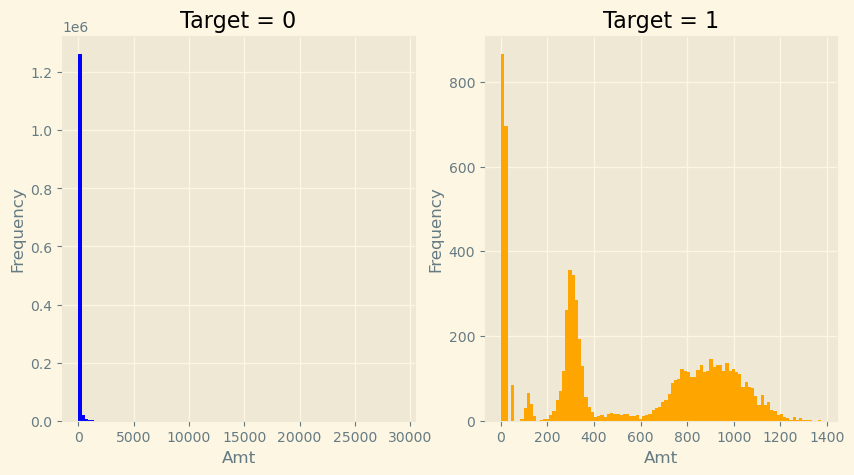

In [38]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the distribution of amt for target == 0
axs[0].hist(df[df['target'] == 0]['amt'], bins=100, color='blue')
axs[0].set_title('Target = 0')

# Plot the distribution of amt for target == 1
axs[1].hist(df[df['target'] == 1]['amt'], bins=100, color='orange')
axs[1].set_title('Target = 1')

# Add x and y axis labels
for ax in axs:
    ax.set_xlabel('Amt')
    ax.set_ylabel('Frequency')

plt.show()

<Axes: xlabel='amt', ylabel='Density'>

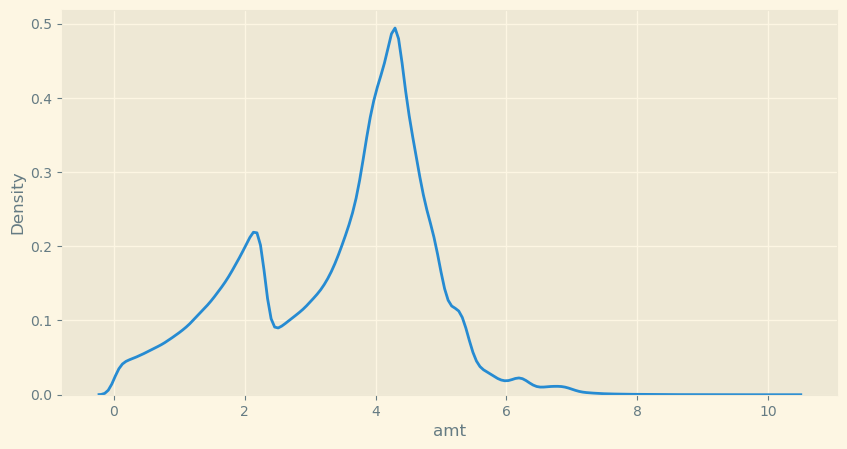

In [39]:
# Log df['amt']??
sns.kdeplot(np.log(df['amt']))

We have a bimodel curve when we log the Amt column.

For ANOMALY detection, we definetly need this column. However, the column is pretty skewed. However, this will be normalized when we use standardscaler() 

>### Zip code Column-'zip'

In [40]:
df['zip'].value_counts()

73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: zip, Length: 970, dtype: int64

We already have the latitudes and Longitudes for where the CCards were charged. We really do not need the 'zip' column.

In [41]:
# add to the drop_list
drop_list.append('zip')

>### Population by City Column-'city_pop'

In [42]:
df['city_pop'].value_counts()

606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
99475         7
198659        7
4046          7
1888          7
3631          7
Name: city_pop, Length: 879, dtype: int64

For Statistical purposes, this could be a good column to keep. To see if the size of the city population is correlated to the CCard fraud. However, for classification i do not think its worth keeping this column. However, we will keep it.

>### Unix-Time Column-'unix_time'

The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch on January 1st, 1970 at UTC. Therefore, the unix time stamp is merely the number of seconds between a particular date and the Unix Epoch. It should also be pointed out that this point in time technically does not change no matter where you are located on the globe. This is very useful to computer systems for tracking and sorting dated information in dynamic and distributed applications both online and client side.

In [43]:
df['unix_time'].value_counts()

1370177227    4
1335110521    4
1370050667    4
1367602155    3
1364686521    3
             ..
1342203558    1
1342203557    1
1342203554    1
1342203541    1
1371816817    1
Name: unix_time, Length: 1274823, dtype: int64

This is an important column for the anomaly detection within rapid transactions.

>### Year, Month, Day, Hour, Minute and Second Columns

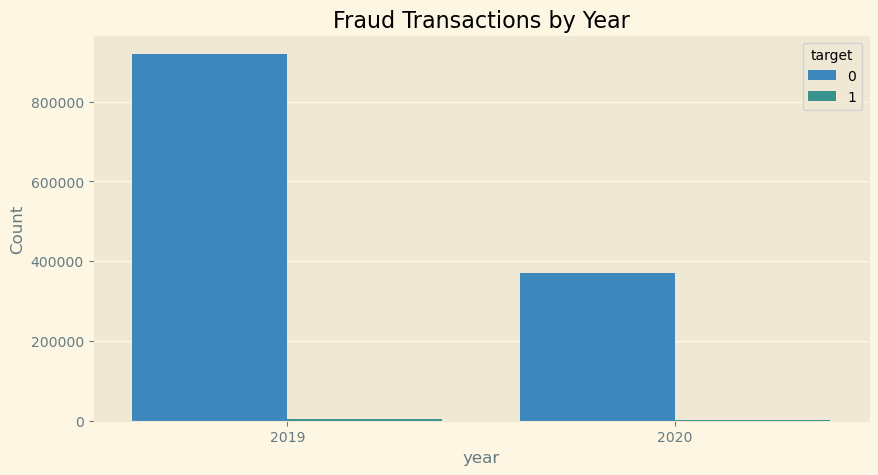

In [44]:
#display(sns.histplot(df['month']))
sns.countplot(data=df, x='year', hue='target')
plt.title('Fraud Transactions by Year')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()


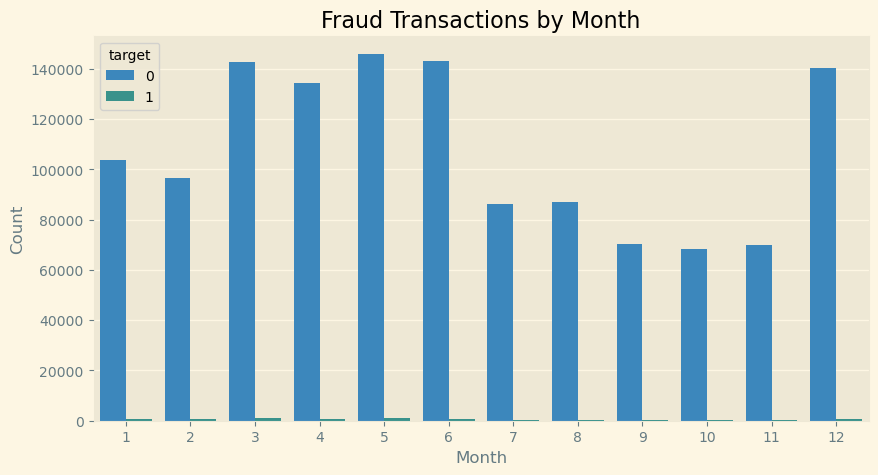

In [45]:
#display(sns.histplot(df['month']))
sns.countplot(data=df, x='month', hue='target')
plt.title('Fraud Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

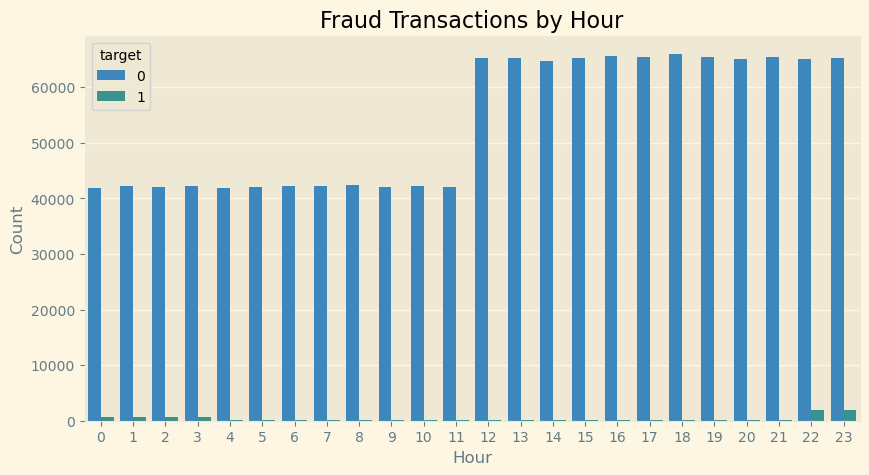

In [46]:
#display(sns.histplot(df['hour']))
sns.countplot(data=df, x='hour', hue='target')
plt.title('Fraud Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

it seems there fraud only occurs during winter months..hahahaha

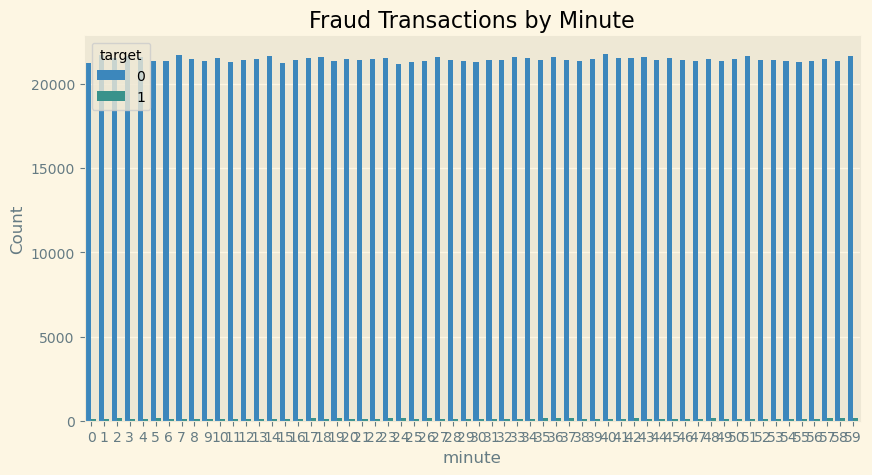

In [47]:
#display(sns.histplot(df['minute']))
sns.countplot(data=df, x='minute', hue='target')
plt.title('Fraud Transactions by Minute')
plt.xlabel('minute')
plt.ylabel('Count')
plt.show()

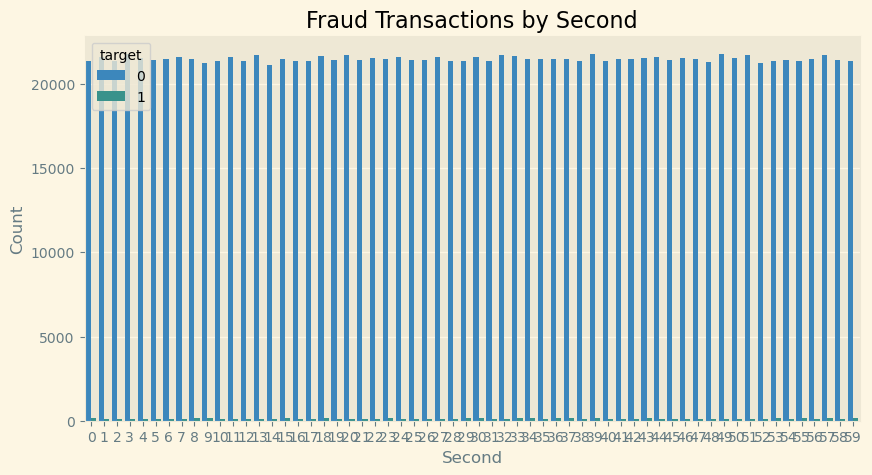

In [48]:
#display(sns.histplot(df['second']))
sns.countplot(data=df, x='second', hue='target')
plt.title('Fraud Transactions by Second')
plt.xlabel('Second')
plt.ylabel('Count')
plt.show()

We need Year, Month, Day, Hour, Minute, Second as they are part of the transaction information to find transactions that occur at unusual times to detect anomaly.

>### Age Column-'age'

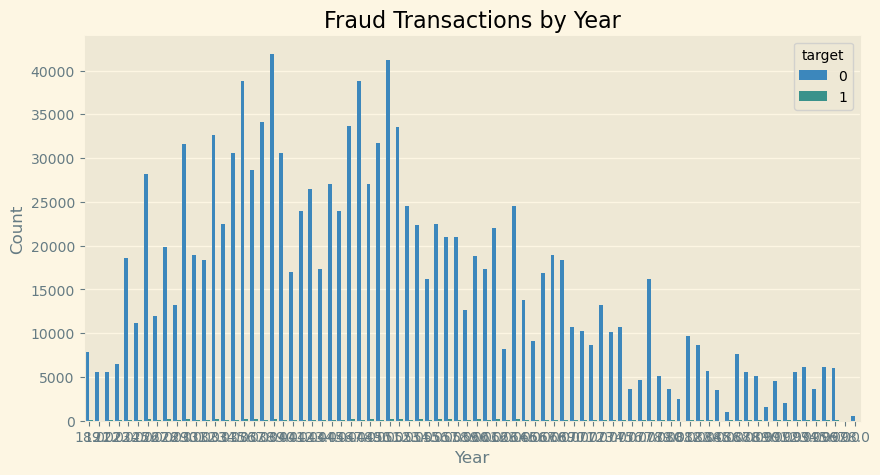

In [49]:
sns.countplot(data=df, x='age', hue='target')
plt.title('Fraud Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The Age column is worth keeping to keep track of how the Ccard frauds occur based on the age of the card holder.

>### Latitude and Logitude Columns (incl. mech_lat, merch_long)

In [50]:
# we only need one set of latitudes and Longitudes.So we can drop the merch_lat and merch_long since we are carrying the Mecrhant column forward.
drop_list.append('merch_lat')
drop_list.append('merch_long')

># Categorical Columns

In [51]:
# What are the Categorical Columns?
df.select_dtypes(exclude=[np.number]).columns

Index(['merchant', 'category', 'gender', 'street', 'city', 'state', 'job',
       'trans_num', 'Names'],
      dtype='object')

>### MERCHANT: Merchant/Financial Institution that issued the CCard

In [52]:
df['merchant'].value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

We need this to check if there is any anomaly in multiple tranactions with the same merchant.

>### CATEGORY: Category of CCard charge

In [53]:
df['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

We need this column to check the Transaction information. If historically, card holder used the card just for gas_transport, and then suddenly used it for kids_pets, that would be an anomaly.

>### GENDER: Gender of CCard Holder

In [54]:
df['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

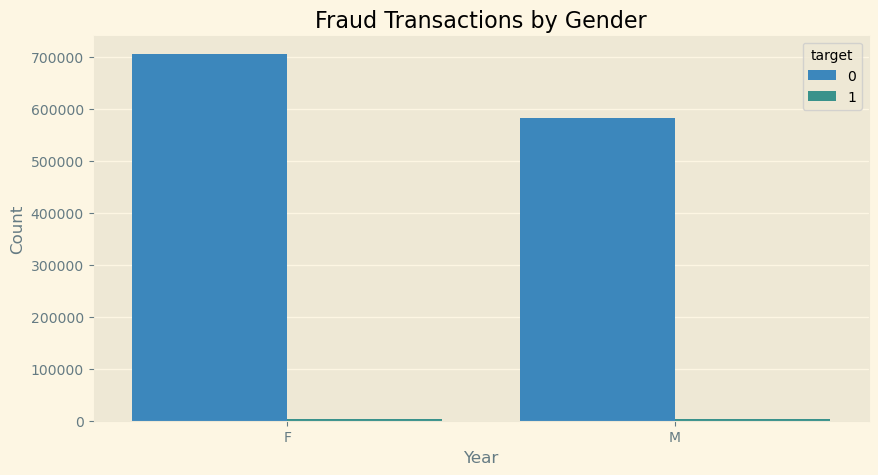

In [55]:
# Distribution of Target by gender
sns.countplot(data=df, x='gender', hue='target')
plt.title('Fraud Transactions by Gender')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

I really do not think this column matters as we are not looking at Credit history for CCard approval. The individual has already been approved. However, for other analysis, yes, this could be important.

>### STREET: Not sure if this is address of Merchant or Person.-'street'

In [56]:
df['street'].value_counts()

0069 Robin Brooks Apt. 695           3123
864 Reynolds Plains                  3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
7281 Joshua Mills Apt. 077              7
3307 Ferguson Way                       7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
27954 Hall Mill Suite 575               7
Name: street, Length: 983, dtype: int64

Not important, as we already have the Latitude and Longitude.

In [57]:
#add to drop_list
drop_list.append('street')

>### CITY: City where transaction occured-'city'

In [58]:
df['city'].value_counts()

Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: city, Length: 894, dtype: int64

Not important, as we already have Latitude and Longitude. However, we will keep this. The more information we have for the model, the better.

In [59]:
#drop_list.append('city')

>### State: State where transaction occured-'state

In [60]:
df['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

We will drop the city column, so maybe we can use the state column

>### JOB: Job Description of CCard holder

In [61]:
df['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

Again, we really dont care about this column, as this is Credit Card Fraud detection, not Credit Card Aproval analysis.

In [62]:
drop_list.append('job')

>TRANSACTION NUMBER: Transaction Number of CCard charge

In [63]:
df['trans_num'].value_counts()

0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: trans_num, Length: 1296675, dtype: int64

We really dont need this as we already have the Unix_Num that is numerical and easy to scale. This column has 1296675 unique values; it would be not be effecient to hot encode this column.

In [64]:
drop_list.append('trans_num')

>NAMES: Names of the CCards holders

In [65]:
df['Names'].value_counts()

Scott-Martin         4618
Jeffrey-Smith        3592
Barbara-Taylor       3123
Monica-Cohen         3123
Jessica-Perez        3119
                     ... 
Mark-Pennington         7
Angelica-Lopez          7
Kelly-Lawrence          7
Cody-Blake              7
Danielle-Schaefer       7
Name: Names, Length: 973, dtype: int64

We already have the Credit Card numbers, hence we do not need the Names as the names are already attached to the Credit Card numbers.

In [66]:
drop_list.append('Names')

>### Drop columns not needed

In [67]:
drop_list

['zip', 'merch_lat', 'merch_long', 'street', 'job', 'trans_num', 'Names']

In [68]:
#Drop the columns we do not need.
df.drop(columns={'zip', 'merch_lat', 'merch_long', 'street', 'job', 'trans_num', 'Names'}, inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,unix_time,year,month,day,hour,minute,second,age,target
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,1325376018,2019,1,1,0,0,18,35.0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,1325376044,2019,1,1,0,0,44,44.0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,1325376051,2019,1,1,0,0,51,61.0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,1325376076,2019,1,1,0,1,16,56.0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,1325376186,2019,1,1,0,3,6,37.0,0


># ANOMALY DETECTION using Tensorflow-Keras

<li>https://deepnote.com/@deepnote/Detecting-credit-card-fraud-using-TensorFlow-and-Keras-9848c5e4-f0a5-4c88-987d-d3b1c171d1be
<li>https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/BaselineFeatureTransformation.html

In [69]:
df.shape

(1296675, 19)

>## Taking care of Imbalance in Target

In [157]:
#df_balanced=balance_dataset(df, .005)
df_balanced=balance_dataset(df, 1)



Shape of Balanced Dataset at rule_percentage, 1, is:  (15012, 19)
Distribution of Targets:
    Total: 15012
    Positive: 7506 (50.00% of total)



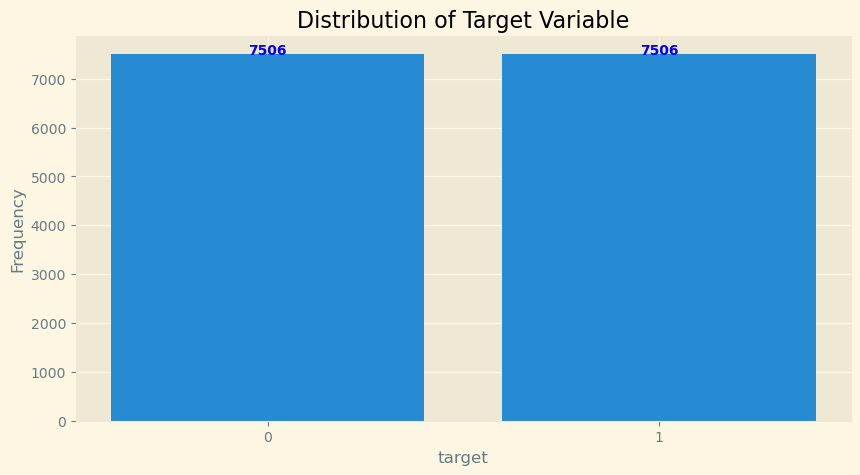

In [158]:
Target_Countplot(df_balanced, 'target')

In [144]:
df_balanced.shape

(22518, 19)

>## Split into X and y

In [159]:
#Split Data into features and target and conduct train test split
X = df_balanced.drop('target', axis=1).values
y = df_balanced['target'].values
X.shape, y.shape

#X = df.drop('target', axis=1).values
#y = df['target'].values
#X.shape, y.shape


((15012, 18), (15012,))

>## Feature Scaling and Label Encoding

In [146]:
X[1]

array([4687263141103, 'fraud_Brown PLC', 'misc_net', 716.13, 'F',
       'Bigelow', 'MN', 43.5336, -95.6515, 399, 1328145810, 2019, 2, 2, 1,
       23, 30, 45.0], dtype=object)

In [160]:
#Label Encode Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])# Label encode Merchant column
X[:, 2] = le.fit_transform(X[:, 2])# Label Encode Category
X[:, 4] = le.fit_transform(X[:, 4])# Label Encode gender
X[:, 5] = le.fit_transform(X[:, 5])# Label Encode state
X[:, 6] = le.fit_transform(X[:, 6])# Label Encode state

In [161]:
# Are we ready to scale?
X[1]

array([4777065439639721, 688, 8, 87.96, 1, 596, 38, 40.1334, -75.4536,
       737, 1338522752, 2019, 6, 1, 3, 52, 32, 35.0], dtype=object)

Using SMOTE with ENN
<li>https://medium.com/towards-data-science/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be

In [162]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
#Scale the data using the X_train and X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #fit_transform fitted to training set so to avoid any information leakage.
X_test = sc.transform(X_test)

In [164]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12009, 18), (3003, 18), (12009,), (3003,))

># Model

In [225]:
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 65
INIT_LR = 0.0001
BS = 15
from tensorflow.keras.optimizers import Adam

>### The Brain

In [226]:
my_brain = Sequential()
"""A rectified linear unit (ReLU) is an activation function that introduces the property of non-linearity to a deep learning model and solves..
 the vanishing gradients issue. "It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning."""

# Using initial 18 neurons == 18 features from X_train.shape
my_brain.add(Dense(18, activation='relu')) #using the Rectified Activation function 'relu' to the input layer.
my_brain.add(Dropout(0.2))

#hidden Layer
my_brain.add(Dense(16, activation='relu'))
my_brain.add(Dropout(0.2))
#hidden Layer
my_brain.add(Dense(13, activation='relu'))
my_brain.add(Dropout(0.2))
#hidden Layer
#my_brain.add(Dense(8, activation='relu'))
#my_brain.add(Dropout(0.2))
#hidden Layer
#my_brain.add(Dense(18, activation='relu'))
#my_brain.add(Dropout(0.2))
#hidden Layer
#my_brain.add(Dense(18, activation='relu'))
#my_brain.add(Dropout(0.2))

#final output
my_brain.add(Dense(1, activation='sigmoid'))

"""Adam optimizer is the extended version of stochastic gradient descent. Adam optimizer gives much higher performance results than the other optimizers..
 and outperforms by a big margin for a better-optimized gradient"""
optimizer=Adam(learning_rate=INIT_LR)
#decay=INIT_LR / NUM_EPOCHS: https://pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/

# Compile my_brain
my_brain.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#my_brain.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [120]:
#help(Dense)

In [227]:
my_brain.fit(x=X_train, 
          y=y_train, 
          epochs=NUM_EPOCHS,
          batch_size=BS,
          validation_data=(X_test, y_test))

Epoch 1/65
801/801 [==============================] - 2s 2ms/step - loss: 0.6004 - accuracy: 0.6540 - val_loss: 0.4431 - val_accuracy: 0.8089
Epoch 2/65
801/801 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.7978 - val_loss: 0.3874 - val_accuracy: 0.8555
Epoch 3/65
801/801 [==============================] - 1s 2ms/step - loss: 0.4299 - accuracy: 0.8328 - val_loss: 0.3726 - val_accuracy: 0.8601
Epoch 4/65
801/801 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8458 - val_loss: 0.3549 - val_accuracy: 0.8668
Epoch 5/65
801/801 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8503 - val_loss: 0.3411 - val_accuracy: 0.8735
Epoch 6/65
801/801 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.8565 - val_loss: 0.3207 - val_accuracy: 0.8745
Epoch 7/65
801/801 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8602 - val_loss: 0.2969 - val_accuracy: 0.8748
Epoch 

>### Loss vs Val-Loss

<Axes: >

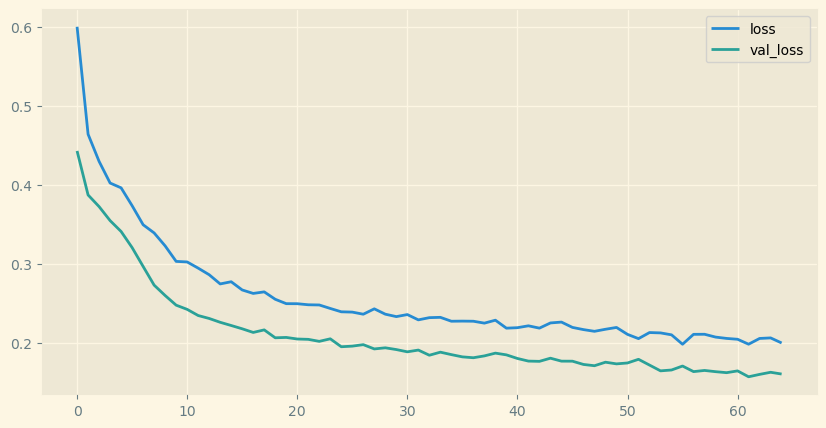

In [228]:
losses = pd.DataFrame(my_brain.history.history)
losses[['loss','val_loss']].plot()

>### Prediction using Classification Report and Matrix

![Alt text](Screenshot%202023-04-08%20145721.png)


In [229]:
#predictions = model.predict_classes(X_test):AttributeError: 'Sequential' object has no attribute 'predict_classes'
# Make predictions
predictions = (my_brain.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

94/94 [==============================] - 0s 740us/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1495
           1       0.94      0.95      0.94      1508

    accuracy                           0.94      3003
   macro avg       0.94      0.94      0.94      3003
weighted avg       0.94      0.94      0.94      3003

[[1396   99]
 [  69 1439]]


>### Save the Model

In [232]:
from tensorflow.keras.models import load_model
  
#import os

#model_path = os.path.join(os.getcwd(), 'models', 'my_model.h5')
my_brain.save('azimsBRAIN.h5')

>## Conclusion

>### PART 1. Things i did to increase Precision and Recall Scores, but also to reduce the difference Loss and Val_loss.

Here is the summary of what i did on the Feature Selection and Model Building side:
<li> Data cleaning: We dropped unnecessary columns. There was no missing data.
<li> Exploratory data analysis: I plotted various graphs and visualizations to get insights from the data, such as scatter plots, bar plots, and histograms.
<li> I encoded the categorical variables using OneHotEncoder (pd.dummies created too many columns) and then scaled the numerical variables using StandardScaler to normalize the data.
<li> Imbalance Target: I used a custom function called balance_dataset() isntead of using SMOTE, which in turn gave me more flexibility in controlling the balance ration betweeh the binary targets. I used rate_percentage of 1 to give me equal target=0 and Target=1. However, the compromise i had to deal with here was that the dataframe was reduced drastically.
<li> For Modeling: I used the a simple ANN neural network model, with 4 layers, including input and output layer with a dropout set at 0.2. I compiled the model to my_brain.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']).
<li> I experimented with various techniques, like implimenting a learning rate for the optimizer of .001 and 0.0001 with different epochs and batch sizes to achive the best Precision and Recall scores. 
<li>Evaluation: Used the classification report and confuxion matrix to evaluate the performance of the model. Was finally able to achive an overall accuracy=94% with very encouraging sub 90's Precision, Recall and F1 scores with my final ANN Model.

Regarding the the reason for not using SMOTE, i noticed a lot of noise and overfitting on the val_loss when looking at the losses chart. Hence decided to create my own function.

Regarding the number of layers, as you can see i started off with 5 hidden layers and then slowly dropped with with diffrernt neurons to acheive the final structure.

I am happy with the model so far, as it acheived a perfect score for Part 2 when predicting one row of external/sample data where the target =1

>### PART 2. Prediction Function.

<li>For part 2, i created a fucntion called Load_process_Predict3 (3 meaning this was my third and final iteration of the function) that loads an external file, processes it, applies the trained model to make predictions and outputs a classification report and confusion matrix. The function performs the same preprocessing steps as the training data, which include converting the trans_date_trans_time column to separate year, month, day, hour, minute, and second columns, concatenating the first and last columns into a single Names column and then dropping them, converting the dob column to an age column, and dropping several unnecessary columns. I also applied label encoding to categorical columns and scale the input features using StandardScaler.
<li>The function uses the same trained model as in part 1 and makes predictions by applying the model to the preprocessed data. I used a threshold of 0.5 to classify each transaction as either fraud or non-fraud.
<li>I tested the function using two test files, one with target labels and one without. I achieved good results on the test files with a classification report showing high precision, recall, and f1-score, as well as a confusion matrix that showed good performance in predicting both fraud and non-fraud transactions.